EM 589: Practical Machine Learning for Enginnering Analytics (Spring 2025)  
Instructor: Fred Livingston (fjliving@ncsu.edu)  
Student: Mike Keating


# Homework 03: Building and Evaluating Decision Trees for Classification


### Objective

The goal of this assignment is to understand how decision trees work and to apply them to a classification problem. You will gain hands-on experience in building, visualizing, and evaluating decision trees.


### Dataset

You will use the Wine dataset, which consists of chemical analysis results of wines grown in the same region in Italy. The dataset has 178 instances, each with 13 features and a class label indicating the wine cultivar.


In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [13]:
# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

#### Load the Wine Dataset [ 5 pts ]

Perform exploratory data analysis to understand the dataset's structure and feature distributions.
Split the dataset into training, and testing sets (2-way holdout e.g., 80% training, 20% testing).


Text(0, 0.5, 'Count')

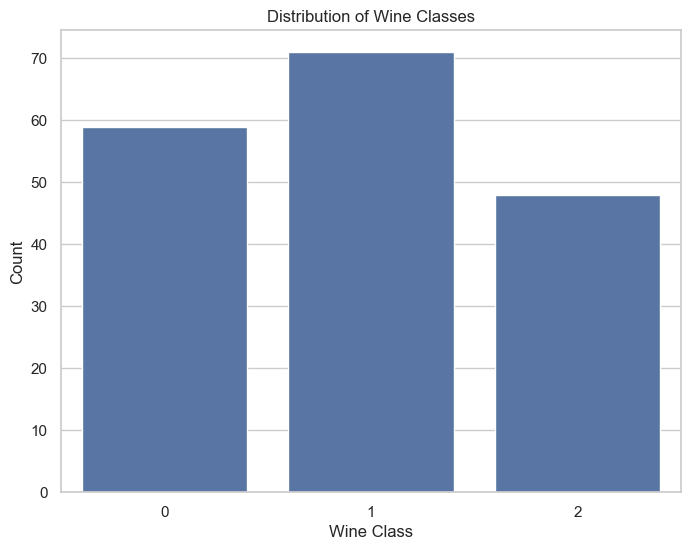

In [14]:
# Explore the dataset
# Convert to DataFrame for better visualization
wine_df = pd.DataFrame(data=X, columns=wine.feature_names)
wine_df["target"] = y

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x="target", data=wine_df)
plt.title("Distribution of Wine Classes")
plt.xlabel("Wine Class")
plt.ylabel("Count")

We are attempting to classify each wine by region the grapes were grown in Italy. The distribution of each region (class) is relatively even.


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Text(0.5, 1.0, 'Alcohol Content Distribution by Wine Class')

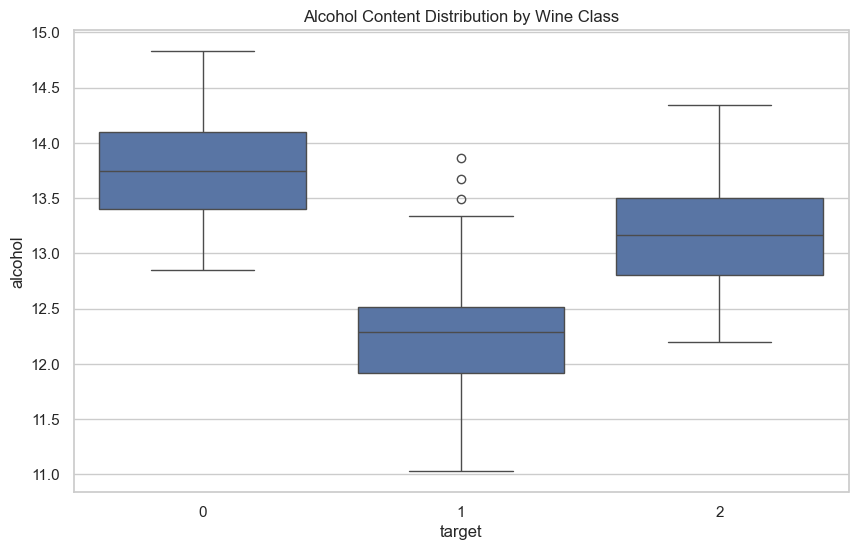

In [15]:
# Visualize alcohol distribution by class
display(wine_df.describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x="target", y="alcohol", data=wine_df)
plt.title("Alcohol Content Distribution by Wine Class")


In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Build a Decision Tree Model [ 10 pts ]

Train a decision tree classifier, with a max dept of 1, on the training data using the scikit-learn library. [ 7 pts ]
Visualize the decision tree structure using a plot (such as a tree diagram). [3 pts]


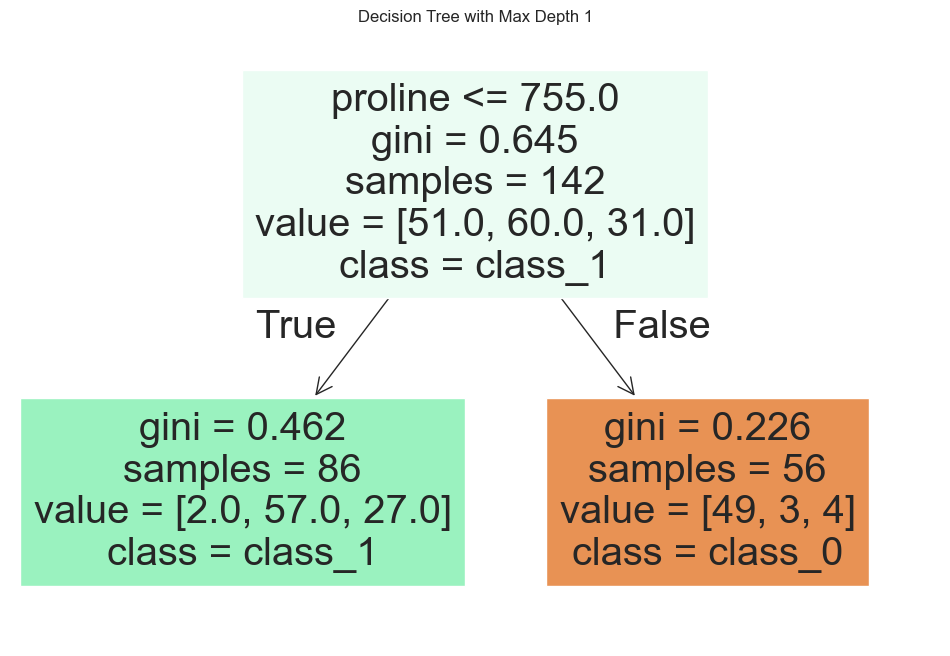

In [19]:
# Train a Decision Tree classifier with a max depth of 1
dtc = DecisionTreeClassifier(max_depth=1, random_state=123)
dtc.fit(X_train, y_train)

# Visualize the Decision Tree using seaborn style

plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.title("Decision Tree with Max Depth 1")
plt.show()

#### Model Evaluation [ 10 pts ]

Evaluate the decision tree's performance on the test set using metrics such as accuracy, precision, recall, and F1-score. [ 5 pts]
Create a confusion matrix to visualize the classification results. [5 pts]


In [20]:
# Evaluate the model
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.50
Precision: 0.28
Recall: 0.50
F1-score: 0.36


Text(0.5, 1.0, 'Confusion Matrix')

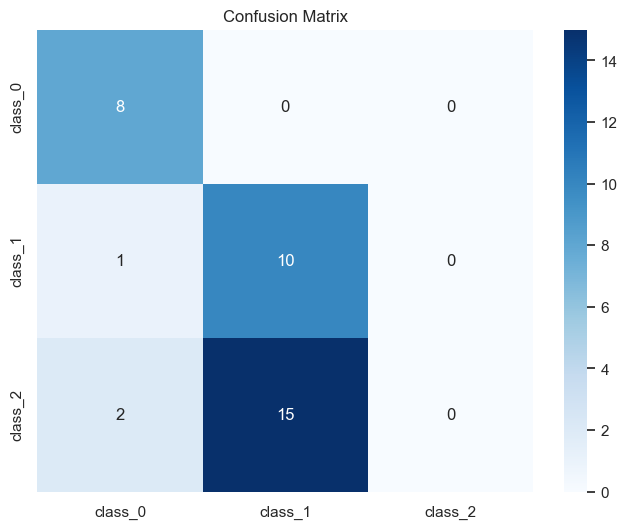

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Confusion Matrix")

#### AdaBoostClassifier [ 20 pts ]

In This section we would like to improve the classification of the Tree Stump using the AdaBoostClassifier [15 pts]; How does the accuracy of this model compare to the previous model? [5 pts ]


c:\Users\Mike\anaconda3\envs\pyml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Accuracy: 1.00
AdaBoost Precision: 1.00
AdaBoost Recall: 1.00
AdaBoost F1-score: 1.00


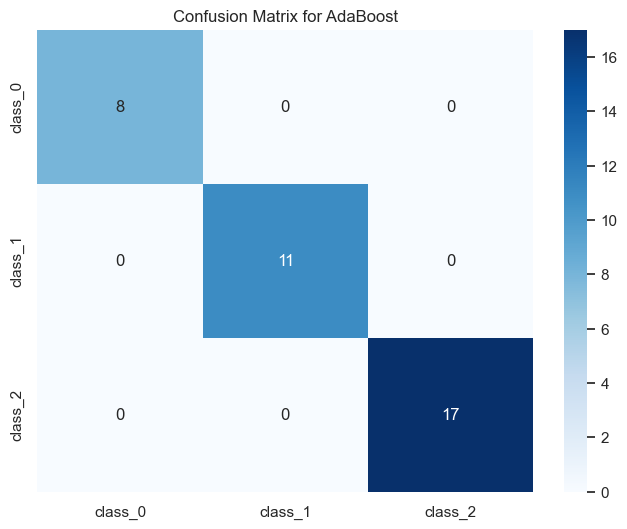

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# Train an AdaBoost classifier with 50 estimators using the 'SAMME' algorithm
ada = AdaBoostClassifier(n_estimators=50, algorithm="SAMME", random_state=123)
ada.fit(X_train, y_train)
# Evaluate the AdaBoost model
y_pred_ada = ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average="weighted", zero_division=0)
recall_ada = recall_score(y_test, y_pred_ada, average="weighted", zero_division=0)
f1_ada = f1_score(y_test, y_pred_ada, average="weighted", zero_division=0)

print(f"AdaBoost Accuracy: {accuracy_ada:.2f}")
print(f"AdaBoost Precision: {precision_ada:.2f}")
print(f"AdaBoost Recall: {recall_ada:.2f}")
print(f"AdaBoost F1-score: {f1_ada:.2f}")

# Confusion Matrix for AdaBoost
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Confusion Matrix for AdaBoost")
plt.show()

The AdaBoostClassifier significantly outperforms the previous model with complete accuracy.


#### Hyperparameter Tuning and Discussion [ 50 pts ]

In This section we would like to utilized Hyperparameter Tuning to improve the accuracy of a simple tree by Experiment with different hyperparameters such as max_depth and evaultion criterion

## Determine the optimal depth for the best predicting the best accuracy [ 30 pts]


In [35]:
# Hyperparameter Tuning
param_grid = {"max_depth": [1, 2, 3, 4, 5], "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 5}
Best Cross-Validation Score: 0.92


## Compare the results and discuss the impact of these hyperparameters on the model's complexity and performance. [10 pts]


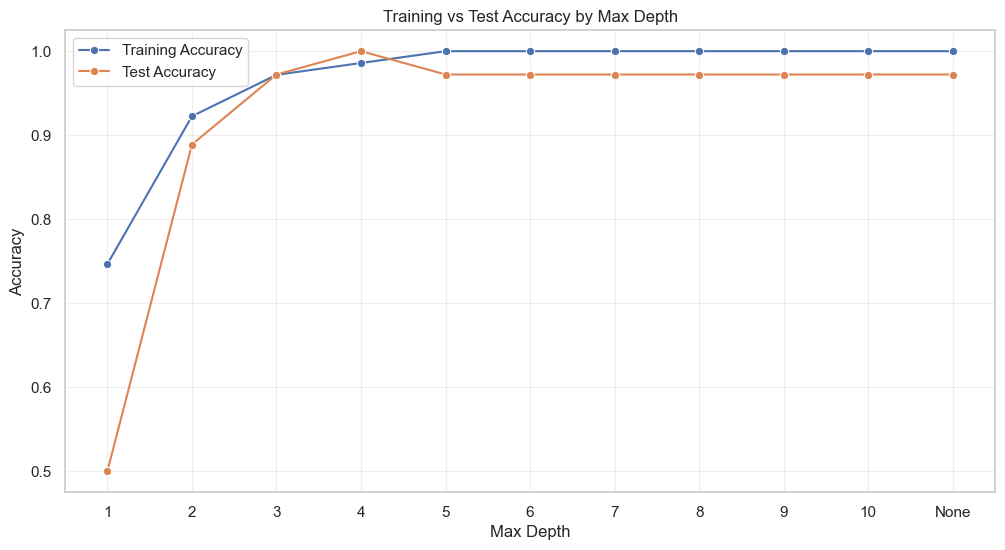


Max Depth Analysis:
Max Depth | Train Acc | Test Acc  | Difference
---------------------------------------------
       1 |   0.7465 |   0.5000 |    0.2465
       2 |   0.9225 |   0.8889 |    0.0336
       3 |   0.9718 |   0.9722 |   -0.0004
       4 |   0.9859 |   1.0000 |   -0.0141
       5 |   1.0000 |   0.9722 |    0.0278
       6 |   1.0000 |   0.9722 |    0.0278
       7 |   1.0000 |   0.9722 |    0.0278
       8 |   1.0000 |   0.9722 |    0.0278
       9 |   1.0000 |   0.9722 |    0.0278
      10 |   1.0000 |   0.9722 |    0.0278
    None |   1.0000 |   0.9722 |    0.0278


In [34]:
# Let's directly compare models with different max depths
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    dtc_temp = DecisionTreeClassifier(max_depth=depth, random_state=123)
    dtc_temp.fit(X_train, y_train)

    train_pred = dtc_temp.predict(X_train)
    test_pred = dtc_temp.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


plt.figure(figsize=(12, 6))
sns.lineplot(x=[str(d) if d is not None else "None" for d in max_depths], y=train_accuracies, marker="o", label="Training Accuracy")
sns.lineplot(x=[str(d) if d is not None else "None" for d in max_depths], y=test_accuracies, marker="o", label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy by Max Depth")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print results table
print("\nMax Depth Analysis:")
print("Max Depth | Train Acc | Test Acc  | Difference")
print("-" * 45)
for i, depth in enumerate(max_depths):
    diff = train_accuracies[i] - test_accuracies[i]
    depth_str = str(depth) if depth is not None else "None"
    print(f"{depth_str:>8} | {train_accuracies[i]:>8.4f} | {test_accuracies[i]:>8.4f} | {diff:>9.4f}")


In [ ]:
# Performance of the best Decision Tree model
best_dtc = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=123)
best_dtc.fit(X_train, y_train)
# Evaluate the best Decision Tree model
y_pred_best = best_dtc.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average="weighted", zero_division=0)
recall_best = recall_score(y_test, y_pred_best, average="weighted", zero_division=0)
f1_best = f1_score(y_test, y_pred_best, average="weighted", zero_division=0)

print(f"Best Decision Tree Accuracy: {accuracy_best:.2f}")
print(f"Best Decision Tree Precision: {precision_best:.2f}")
print(f"Best Decision Tree Recall: {recall_best:.2f}")
print(f"Best Decision Tree F1-score: {f1_best:.2f}")


Best Decision Tree Accuracy: 0.97
Best Decision Tree Precision: 0.98
Best Decision Tree Recall: 0.97
Best Decision Tree F1-score: 0.97


The ensemble method gave us a perfect classification of the wine dataset. I was initially suspicious of this but research online states that this dataset is famously suited for classification and contains easily separable features.

### max_depth

There seems to be a sweet spot of depth from 3-5, where the model makes large gains in accuracy with a marginal increase in complexity. Going deeper however can risk overfitting.

### gini vs entropy

For this dataset, there is not an expected significant difference between

## How does the optimized decision tree model compare to the tree stump and the Ensembled Model? [10 pts]

The optimized decision tree model performed very well, with an accuracy of 0.97, but it was still outperformed by the ensemble model, which does a better job reducing bias and overfitting, since the averaging of many weak learners can aggregate results. This dataset is likely well suited for AdaBoost because it doesn't really contain extreme outliers.
